In [1]:
# === Step 1: Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# === Step 2: Load the dataset ===
df = pd.read_csv("dataset_phishing.csv")  # Replace with the correct path if needed

In [3]:
# === Step 3: Basic Exploration ===
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("Sample rows:\n", df.head())

Shape of dataset: (11430, 89)
Columns: ['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'r

In [4]:
# === Step 4: Preprocessing ===
# Drop the non-numeric 'url' column
df = df.drop(columns=["url"])

In [5]:
# Encode target column 'status' (legitimate = 0, phishing = 1)
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [6]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum().sort_values(ascending=False))


Missing values in each column:
 length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 88, dtype: int64


In [7]:
# === Step 5: Features and Target ===
X = df.drop(columns=["status"])
y = df["status"]

In [8]:
# Optional: Feature scaling (useful for some models, not required for Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# === Step 6: Train-test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [10]:
# === Step 7: Train the Classifier ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# === Step 8: Make Predictions ===
y_pred = model.predict(X_test)

In [12]:
# === Step 9: Evaluation ===
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc * 100:.2f}%\n")

print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))



✅ Model Accuracy: 96.94%

📊 Classification Report:
               precision    recall  f1-score   support

  legitimate       0.96      0.98      0.97      1157
    phishing       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



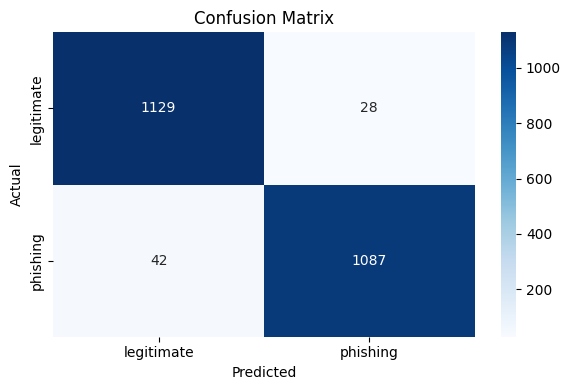

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

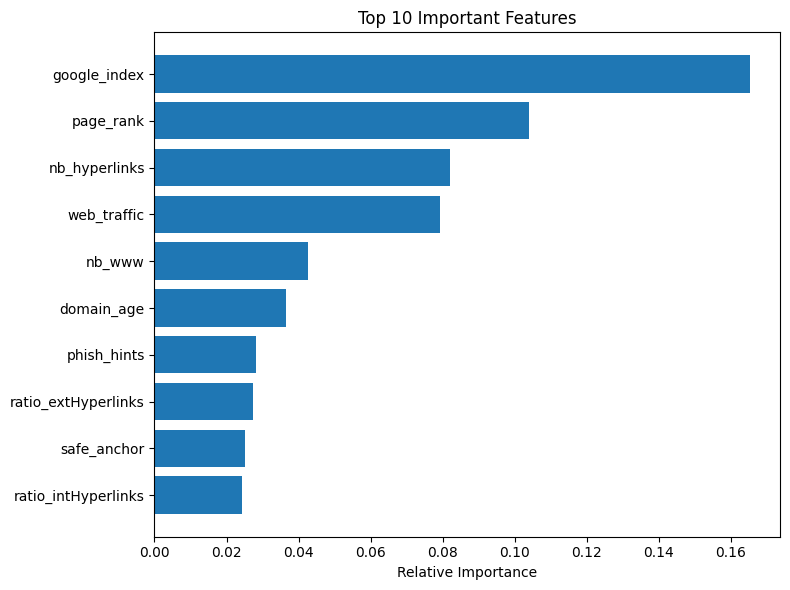

In [14]:
# === Step 10: Feature Importance ===
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8, 6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [15]:
import joblib

# Save model to file
joblib.dump(model, "phishing_model.pkl")

# Save the scaler too (used during feature scaling)
joblib.dump(scaler, "phishing_scaler.pkl")



['phishing_scaler.pkl']

In [16]:
model = joblib.load("phishing_model.pkl")
scaler = joblib.load("phishing_scaler.pkl")
